In [3]:
import scipy.optimize as opt
import scipy.ndimage as sim
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spat
import scipy.ndimage as sim
import scipy.interpolate as intp
import warnings
import matplotlib.animation
warnings.filterwarnings("default")

We load the files

In [4]:
pointdat=np.load("./data/raw/Pointdat-184.npy",allow_pickle=True)
ground=np.load("./data/ground.npy")

We define an energy function, details in the ppt

In [5]:
def energy(pts,sh):
    pts=pts.reshape(sh)
    return regul*0.5*np.sum(kmat*(spat.distance_matrix(pts,pts)-dmatori)**2)+np.sum(sim.map_coordinates(pot,[pts[:,0],pts[:,1]],order=1,mode="nearest"))

We generate the potential

Text(0.5, 1.0, 'Potential')

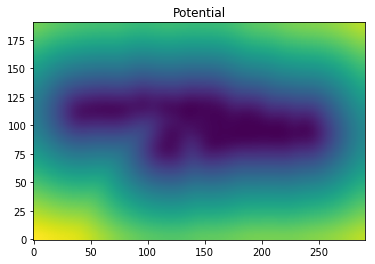

In [9]:
pot=np.empty((291,191))
tree=spat.cKDTree(ground[:,:2])
for i in range(291):
    for j in range(191):
        d,x=tree.query([i,j-95],k=1)
        pot[i,j]=d/100
        continue
        d=d[1]
        if d<25:
            pot[i,j]=d*2.5/100
        else:
            pot[i,j]=d**2/1000
pot=sim.gaussian_filter(pot,6)
plt.imshow(np.log(pot+1).T,origin="below")
plt.title("Potential")

Check the straightening for one frame:

In [10]:
t=82
#np.random.randint(0,3002)
if len(pointdat[t])==0:
    assert False,"No dat"
pts=pointdat[t][:,:2]+np.array([0,20])#2d straightening
regul=0.1
dmatori=spat.distance_matrix(pts,pts)
kmat=1/(4**2+dmatori**2)

This is the distance matrix

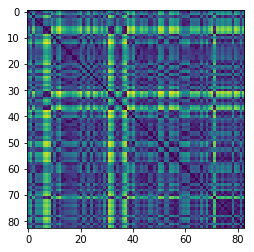

In [11]:
plt.imshow(dmatori)

This is the spring constant distribution

Text(0.5, 0, 'd')

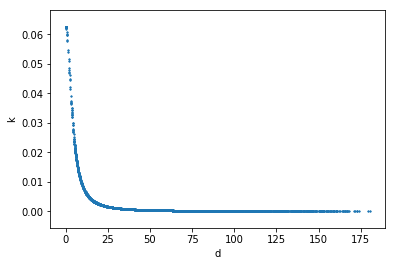

In [12]:
plt.scatter(dmatori.flatten(),kmat.flatten(),s=1)
plt.ylabel("k")
plt.xlabel("d")

We can use hand written SGD with momentum, N-body methods or scipy minimize. Later on, an optimized code will be much faster.

In [13]:
optres=opt.minimize(energy,pts.flatten(),args=(pts.shape,),method='SLSQP', options={'ftol':1e-9,'disp': True,'maxiter':500})

Iteration limit exceeded    (Exit mode 9)
            Current function value: 4.226604554626686
            Iterations: 501
            Function evaluations: 84269
            Gradient evaluations: 501


In [14]:
res=optres["x"].reshape(pts.shape)

Plot the result in the potential. We see that the local geometry is well preserved

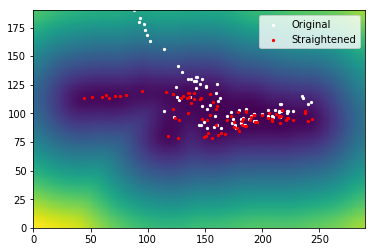

In [16]:
plt.scatter(*pts.T,s=5,c="white",label="Original")
plt.scatter(*res.T,s=5,c="r",label="Straightened")
plt.imshow(pot.T,origin="below")
plt.xlim(0,290)
plt.ylim(0,190)
plt.legend()

Now we do this for all frames, setting up error handling and checkpoints

In [5]:
allstates=[]
for i in range(3002):
    print("\r Time: "+str(i))
    if len(pointdat[i])==0:
        allstates.append([])
        continue
    pts=pointdat[i][:,:2]+np.array([0,20])
    regul=0.1
    dmatori=spat.distance_matrix(pts,pts)
    kmat=1/(4**2+dmatori**2)
    optres=opt.minimize(energy,pts.flatten(),args=(pts.shape,),method='SLSQP', options={'ftol':1e-6,'disp': True,'maxiter':500})
    res=optres["x"].reshape(pts.shape)
    if np.max(np.abs(res))>300:
        allstates.append("div")
        continue
    allstates.append(res)
    if (i+1)%100==0:
        np.save("./allstates.npy",allstates)
np.save("./allstates.npy",allstates)

 Time: 750
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.587327003443484
            Iterations: 300
            Function evaluations: 50421
            Gradient evaluations: 300
 Time: 751
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.5185762625588475
            Iterations: 295
            Function evaluations: 48997
            Gradient evaluations: 295
 Time: 752
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.544235968661488
            Iterations: 297
            Function evaluations: 49915
            Gradient evaluations: 297
 Time: 753
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.5298633376984623
            Iterations: 324
            Function evaluations: 53800
            Gradient evaluations: 324
 Time: 754
Optimization terminated successfully.    (Exit mode 0)
            Current function

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7354699679922687
            Iterations: 342
            Function evaluations: 57477
            Gradient evaluations: 342
 Time: 788
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.155367010201893
            Iterations: 209
            Function evaluations: 31784
            Gradient evaluations: 209
 Time: 789
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.652054326419941
            Iterations: 355
            Function evaluations: 34815
            Gradient evaluations: 355
 Time: 790
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5662304525506856
            Iterations: 222
            Function evaluations: 8903
            Gradient evaluations: 222
 Time: 791
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.11

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.794797138908056
            Iterations: 307
            Function evaluations: 23349
            Gradient evaluations: 307
 Time: 825
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.6697982935480078
            Iterations: 355
            Function evaluations: 24880
            Gradient evaluations: 355
 Time: 826
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1128927249425646
            Iterations: 239
            Function evaluations: 21535
            Gradient evaluations: 239
 Time: 827
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.311864827857126
            Iterations: 119
            Function evaluations: 18334
            Gradient evaluations: 119
 Time: 828
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.0

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1952363743216448
            Iterations: 233
            Function evaluations: 20986
            Gradient evaluations: 233
 Time: 862
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.609009590643424
            Iterations: 369
            Function evaluations: 42832
            Gradient evaluations: 369
 Time: 863
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4249157460175343
            Iterations: 332
            Function evaluations: 53814
            Gradient evaluations: 332
 Time: 864
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.160539295872363
            Iterations: 300
            Function evaluations: 44422
            Gradient evaluations: 300
 Time: 865
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.2

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6217848021115113
            Iterations: 329
            Function evaluations: 52666
            Gradient evaluations: 329
 Time: 899
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6628435194903637
            Iterations: 302
            Function evaluations: 47737
            Gradient evaluations: 302
 Time: 900
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.692448778139272
            Iterations: 300
            Function evaluations: 49220
            Gradient evaluations: 300
 Time: 901
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.52157303624319
            Iterations: 317
            Function evaluations: 51380
            Gradient evaluations: 317
 Time: 902
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.56

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.8538973840351693
            Iterations: 172
            Function evaluations: 23746
            Gradient evaluations: 172
 Time: 936
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9036606723518115
            Iterations: 224
            Function evaluations: 31824
            Gradient evaluations: 224
 Time: 937
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.0242806341507746
            Iterations: 310
            Function evaluations: 45903
            Gradient evaluations: 310
 Time: 938
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.800198905306231
            Iterations: 209
            Function evaluations: 29693
            Gradient evaluations: 209
 Time: 939
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.759972619469711
            Iterations: 284
            Function evaluations: 36938
            Gradient evaluations: 284
 Time: 973
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.497688743854802
            Iterations: 302
            Function evaluations: 33247
            Gradient evaluations: 302
 Time: 974
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9250050121640534
            Iterations: 290
            Function evaluations: 39467
            Gradient evaluations: 290
 Time: 975
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.561583785861386
            Iterations: 159
            Function evaluations: 26405
            Gradient evaluations: 159
 Time: 976
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.59

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.188606644742901
            Iterations: 299
            Function evaluations: 29930
            Gradient evaluations: 299
 Time: 1010
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.5613806372688837
            Iterations: 309
            Function evaluations: 34632
            Gradient evaluations: 309
 Time: 1011
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.631226546307797
            Iterations: 269
            Function evaluations: 31221
            Gradient evaluations: 269
 Time: 1012
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.8201946196146888
            Iterations: 296
            Function evaluations: 36126
            Gradient evaluations: 296
 Time: 1013
Optimization terminated successfully.    (Exit mode 0)
            Current function value:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.2334109614961197
            Iterations: 265
            Function evaluations: 40826
            Gradient evaluations: 265
 Time: 1046
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.997267619450008
            Iterations: 297
            Function evaluations: 44564
            Gradient evaluations: 297
 Time: 1047
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4748056180266667
            Iterations: 288
            Function evaluations: 38031
            Gradient evaluations: 288
 Time: 1048
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1353148165493656
            Iterations: 264
            Function evaluations: 19023
            Gradient evaluations: 264
 Time: 1049
Optimization terminated successfully.    (Exit mode 0)
            Current function value

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4854770325696656
            Iterations: 296
            Function evaluations: 48564
            Gradient evaluations: 296
 Time: 1082
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.504149769766581
            Iterations: 300
            Function evaluations: 50415
            Gradient evaluations: 300
 Time: 1083
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.506782737767209
            Iterations: 317
            Function evaluations: 53283
            Gradient evaluations: 317
 Time: 1084
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.499906101778036
            Iterations: 300
            Function evaluations: 49819
            Gradient evaluations: 300
 Time: 1085
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.2685392518109166
            Iterations: 297
            Function evaluations: 48142
            Gradient evaluations: 297
 Time: 1119
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.345565792237583
            Iterations: 179
            Function evaluations: 29368
            Gradient evaluations: 179
 Time: 1120
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.362607757589338
            Iterations: 242
            Function evaluations: 39716
            Gradient evaluations: 242
 Time: 1121
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.3711112077948373
            Iterations: 193
            Function evaluations: 31659
            Gradient evaluations: 193
 Time: 1122
Optimization terminated successfully.    (Exit mode 0)
            Current function value:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.1071661603501637
            Iterations: 317
            Function evaluations: 48210
            Gradient evaluations: 317
 Time: 1156
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9316386812036144
            Iterations: 327
            Function evaluations: 47776
            Gradient evaluations: 327
 Time: 1157
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.8997525767475936
            Iterations: 281
            Function evaluations: 39910
            Gradient evaluations: 281
 Time: 1158
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.995395246656119
            Iterations: 280
            Function evaluations: 40894
            Gradient evaluations: 280
 Time: 1159
Optimization terminated successfully.    (Exit mode 0)
            Current function value

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.49280030323517
            Iterations: 290
            Function evaluations: 47013
            Gradient evaluations: 290
 Time: 1193
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.308437779514079
            Iterations: 175
            Function evaluations: 28010
            Gradient evaluations: 175
 Time: 1194
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.1697130234528514
            Iterations: 182
            Function evaluations: 28408
            Gradient evaluations: 182
 Time: 1195
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.2499900812595963
            Iterations: 202
            Function evaluations: 31935
            Gradient evaluations: 202
 Time: 1196
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7997309160490196
            Iterations: 375
            Function evaluations: 60791
            Gradient evaluations: 375
 Time: 1230
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7943704503425897
            Iterations: 399
            Function evaluations: 65480
            Gradient evaluations: 399
 Time: 1231
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7113419593993626
            Iterations: 193
            Function evaluations: 31666
            Gradient evaluations: 193
 Time: 1232
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.58863608473549
            Iterations: 301
            Function evaluations: 48792
            Gradient evaluations: 301
 Time: 1233
Optimization terminated successfully.    (Exit mode 0)
            Current function value:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.1055864774830533
            Iterations: 155
            Function evaluations: 24194
            Gradient evaluations: 155
 Time: 1266
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.3393894741657184
            Iterations: 280
            Function evaluations: 46499
            Gradient evaluations: 280
 Time: 1267
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.419382328948786
            Iterations: 271
            Function evaluations: 45009
            Gradient evaluations: 271
 Time: 1268
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.440608481308123
            Iterations: 174
            Function evaluations: 28896
            Gradient evaluations: 174
 Time: 1269
Optimization terminated successfully.    (Exit mode 0)
            Current function value:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.657414614519886
            Iterations: 291
            Function evaluations: 47175
            Gradient evaluations: 291
 Time: 1303
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.5497947418157105
            Iterations: 317
            Function evaluations: 51393
            Gradient evaluations: 317
 Time: 1304
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4719140317558765
            Iterations: 328
            Function evaluations: 53832
            Gradient evaluations: 328
 Time: 1305
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.3989628733284936
            Iterations: 276
            Function evaluations: 45292
            Gradient evaluations: 276
 Time: 1306
Optimization terminated successfully.    (Exit mode 0)
            Current function value

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.55885725534969
            Iterations: 165
            Function evaluations: 27073
            Gradient evaluations: 165
 Time: 1339
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.654987401361396
            Iterations: 192
            Function evaluations: 31895
            Gradient evaluations: 192
 Time: 1340
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7042266179492147
            Iterations: 307
            Function evaluations: 50384
            Gradient evaluations: 307
 Time: 1341
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7512986702705526
            Iterations: 318
            Function evaluations: 52181
            Gradient evaluations: 318
 Time: 1342
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.452883617761673
            Iterations: 303
            Function evaluations: 49724
            Gradient evaluations: 303
 Time: 1376
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.480150588808435
            Iterations: 295
            Function evaluations: 48403
            Gradient evaluations: 295
 Time: 1377
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4093092753270033
            Iterations: 319
            Function evaluations: 51705
            Gradient evaluations: 319
 Time: 1378
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.508773747438006
            Iterations: 291
            Function evaluations: 48329
            Gradient evaluations: 291
 Time: 1379
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.572052974054577
            Iterations: 302
            Function evaluations: 47137
            Gradient evaluations: 302
 Time: 1413
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.612202522054559
            Iterations: 262
            Function evaluations: 41412
            Gradient evaluations: 262
 Time: 1414
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.4389167513182177
            Iterations: 260
            Function evaluations: 39542
            Gradient evaluations: 260
 Time: 1415
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.369449550402451
            Iterations: 155
            Function evaluations: 23573
            Gradient evaluations: 155
 Time: 1416
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.421980224721542
            Iterations: 210
            Function evaluations: 32357
            Gradient evaluations: 210
 Time: 1450
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7479240231525885
            Iterations: 312
            Function evaluations: 51187
            Gradient evaluations: 312
 Time: 1451
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.843966920081361
            Iterations: 355
            Function evaluations: 58963
            Gradient evaluations: 355
 Time: 1452
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.9061639464523683
            Iterations: 347
            Function evaluations: 57623
            Gradient evaluations: 347
 Time: 1453
Optimization terminated successfully.    (Exit mode 0)
            Current function value:

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.8719929707909926
            Iterations: 313
            Function evaluations: 51978
            Gradient evaluations: 313
 Time: 1487
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.132929846018999
            Iterations: 399
            Function evaluations: 66270
            Gradient evaluations: 399
 Time: 1488
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.589167796971129
            Iterations: 205
            Function evaluations: 29944
            Gradient evaluations: 205
 Time: 1489
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.377990223632074
            Iterations: 230
            Function evaluations: 31302
            Gradient evaluations: 230
 Time: 1490
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

Save it

In [0]:
#np.save("./allstates.npy",allstates)